**Q.1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Answer:-  To perform a matrix multiplication between a (n, k) and (k, m) matrix, you need to perform the following operations:

For each element in the resulting (n, m) matrix, we need to perform k multiplications and k-1 additions. This is because each element in the resulting matrix is the dot product of a row in the first matrix and a column in the second matrix.
Since there are n rows in the first matrix and m columns in the second matrix, you need to perform the above operations n*m times.
Therefore, the total number of multiplications needed is nmk, and the total number of additions needed is nm(k-1).

**Q.2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [ ]:
import time
import numpy as np

# Define the matrices
n, k, m = 100, 200, 300
A_list = [[i*j for j in range(k)] for i in range(n)]
B_list = [[i*j for j in range(m)] for i in range(k)]

A_numpy = np.array(A_list)
B_numpy = np.array(B_list)

# Matrix multiplication using list of lists
def matmul_list(A, B):
    n, k = len(A), len(A[0])
    k, m = len(B), len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    return C

# Matrix multiplication using numpy
def matmul_numpy(A, B):
    return np.matmul(A, B)

# Time the list of lists solution
start_time = time.time()
C_list = matmul_list(A_list, B_list)
end_time = time.time()
list_time = end_time - start_time

# Time the numpy solution
start_time = time.time()
C_numpy = matmul_numpy(A_numpy, B_numpy)
end_time = time.time()
numpy_time = end_time - start_time

print(f"List of lists time: {list_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")

List of lists time: 1.495623 seconds
NumPy time: 0.006881 seconds


**Answer:-** NumPy is faster for several reasons:


*   **Vectorized operations:** NumPy performs operations on entire arrays at once,
     rather than iterating over individual elements. This reduces the overhead of Python's interpreter and makes the code more efficient.
    
*   **Native code:** NumPy's core operations are implemented in C, which is a lower-level language that can take advantage of the CPU's capabilities more directly. This makes NumPy's operations much faster than equivalent Python code.
*   **Memory layout:** NumPy arrays are stored in a contiguous block of memory, which makes it easier for the CPU to access and manipulate the data. In contrast, Python lists are stored as a collection of separate objects, which can lead to slower memory access.
*   **Optimized algorithms:** NumPy's matrix multiplication algorithm is highly optimized and takes advantage of the CPU's cache hierarchy, which reduces the number of memory accesses and makes the operation faster.


Q.3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [ ]:
import time
import numpy as np

def find_median_naive(arr):
    n = len(arr)
    for i in range(n // 2):
        max_idx = i
        for j in range(i + 1, n):
            if arr[j] > arr[max_idx]:
                max_idx = j
        arr[i], arr[max_idx] = arr[max_idx], arr[i]
    if n % 2 == 0:
        return (arr[n // 2 - 1] + arr[n // 2]) / 2
    else:
        return arr[n // 2]

def find_median_sort(arr):
    arr.sort()
    n = len(arr)
    if n % 2 == 0:
        return (arr[n // 2 - 1] + arr[n // 2]) / 2
    else:
        return arr[n // 2]

# Generate a random array
arr = np.random.rand(10000)

# Time the naive method
start_time = time.time()
median_naive = find_median_naive(arr.copy())
end_time = time.time()
naive_time = end_time - start_time

# Time the sort method
start_time = time.time()
median_sort = find_median_sort(arr.copy())
end_time = time.time()
sort_time = end_time - start_time

# Time the numpy method
start_time = time.time()
median_numpy = np.median(arr)
end_time = time.time()
numpy_time = end_time - start_time

print(f"Naive method time: {naive_time:.6f} seconds")
print(f"Sort method time: {sort_time:.6f} seconds")
print(f"NumPy method time: {numpy_time:.6f} seconds")

Naive method time: 14.176837 seconds
Sort method time: 0.003521 seconds
NumPy method time: 0.004479 seconds


**Q4) What is the gradient of the following function with respect to x and y?**
**x^2y + y^3 sin(x)**

∇f(x, y) = (∂f/∂x, ∂f/∂y) = (2xy + y^3 cos(x), x^2 + 3y^2 sin(x))

**Q.5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [1]:
import jax
import jax.numpy as jnp
import numpy as np

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Compute the gradient using JAX
grad_f_x = jax.grad(f, argnums=0)
grad_f_y = jax.grad(f, argnums=1)

# Analytical gradient
def analytical_grad(x, y):
    grad_x = 2*x*y + y**3 * jnp.cos(x)
    grad_y = x**2 + 3*y**2 * jnp.sin(x)
    return grad_x, grad_y

# Test with random values of x and y
np.random.seed(0)
for _ in range(5):
    x = np.random.uniform(-10, 10)
    y = np.random.uniform(-10, 10)

    # JAX gradient
    jax_grad_x = grad_f_x(x, y)
    jax_grad_y = grad_f_y(x, y)

    # Analytical gradient
    anal_grad_x, anal_grad_y = analytical_grad(x, y)

    print(f"x = {x:.4f}, y = {y:.4f}")
    print(f"JAX Gradient: ({jax_grad_x:.4f}, {jax_grad_y:.4f})")
    print(f"Analytical Gradient: ({anal_grad_x:.4f}, {anal_grad_y:.4f})")
    print()

x = 0.9763, y = 4.3038
JAX Gradient: (53.0543, 46.9862)
Analytical Gradient: (53.0543, 46.9862)

x = 2.0553, y = 0.8977
JAX Gradient: (3.3530, 6.3633)
Analytical Gradient: (3.3530, 6.3633)

x = -1.5269, y = 2.9179
JAX Gradient: (-7.8206, -23.1861)
Analytical Gradient: (-7.8206, -23.1861)

x = -1.2483, y = 7.8355
JAX Gradient: (132.9217, -173.1274)
Analytical Gradient: (132.9217, -173.1274)

x = 9.2733, y = -2.3312
JAX Gradient: (-30.7118, 88.4541)
Analytical Gradient: (-30.7118, 88.4541)



Q.6) Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
import sympy as sp
x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)
grad_f = sp.Matrix([f]).jacobian([x, y])
print(grad_f)

Matrix([[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]])


Q.7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1.   2022
       1.   Branch 1
              1.   Roll Number: 1, Name: N, Marks:
                  1.   Maths: 100, English: 70 …
                  
       2.   Branch 1

2.  2023
       1.   Branch 1
       2.   Branch 1

3.  2024
       1.   Branch 1
       2.   Branch 1

4.  2025
       1.   Branch 1
       2.   Branch 1

In [ ]:
def create_nested_dictionary(years, branches, students):
    data = {}
    for year in years:
        data[year] = {}
        for branch in branches:
            data[year][branch] = {}
            for student in students:
                roll_number = student['roll_number']
                data[year][branch][roll_number] = {
                    'name': student['name'],
                    'marks': student['marks']
                }
    return data

# Example usage:
years = [2022, 2023, 2024, 2025]
branches = ['Branch 1']
students = [
    {'roll_number': 1, 'name': 'N', 'marks': {'Maths': 100, 'English': 70}},
    {'roll_number': 2, 'name': 'M', 'marks': {'Maths': 90, 'English': 80}}
]

nested_dict = create_nested_dictionary(years, branches, students)
print(nested_dict)


{2022: {'Branch 1': {1: {'name': 'N', 'marks': {'Maths': 100, 'English': 70}}, 2: {'name': 'M', 'marks': {'Maths': 90, 'English': 80}}}}, 2023: {'Branch 1': {1: {'name': 'N', 'marks': {'Maths': 100, 'English': 70}}, 2: {'name': 'M', 'marks': {'Maths': 90, 'English': 80}}}}, 2024: {'Branch 1': {1: {'name': 'N', 'marks': {'Maths': 100, 'English': 70}}, 2: {'name': 'M', 'marks': {'Maths': 90, 'English': 80}}}}, 2025: {'Branch 1': {1: {'name': 'N', 'marks': {'Maths': 100, 'English': 70}}, 2: {'name': 'M', 'marks': {'Maths': 90, 'English': 80}}}}}


Q.8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.




In [13]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)


Q.9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.




1) y = x


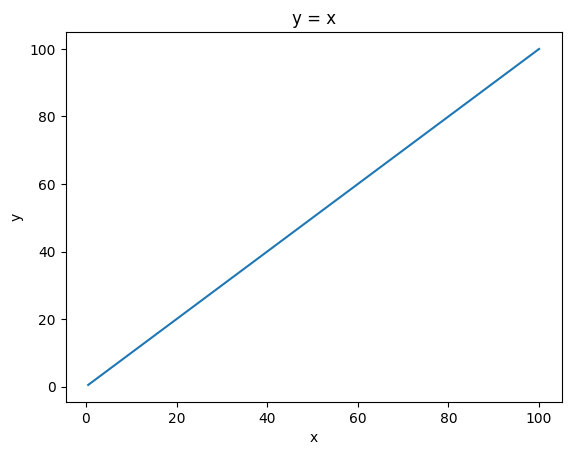

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.2, 0.5)
y = x

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x')

plt.show()

2) y=x^2

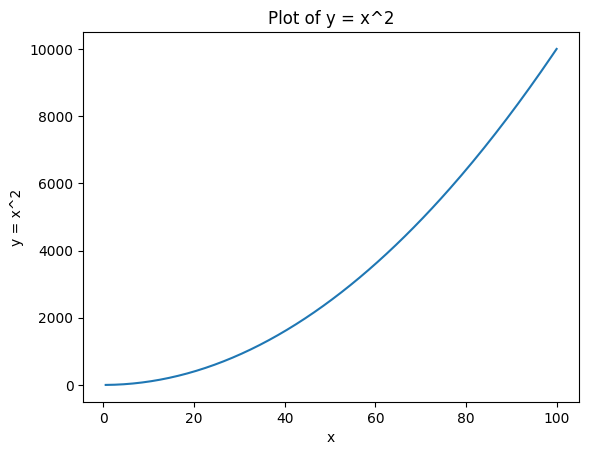

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)
y = x**2

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y = x^2')
plt.title('Plot of y = x^2')

plt.show()

3) x^3/100

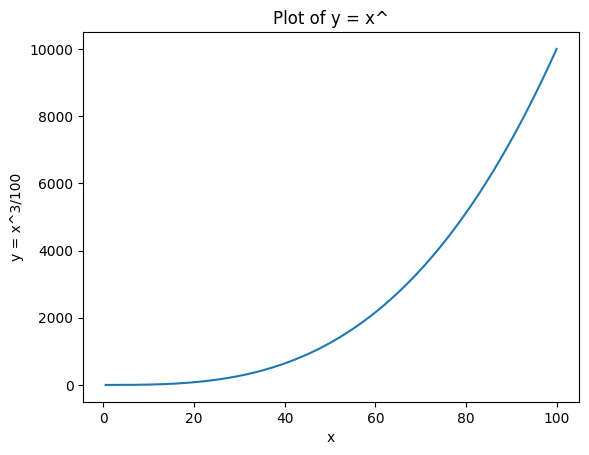

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)
y = (x**3)/100

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y = x^3/100')
plt.title('Plot of y = x^')

plt.show()

4)  y = sin(x)

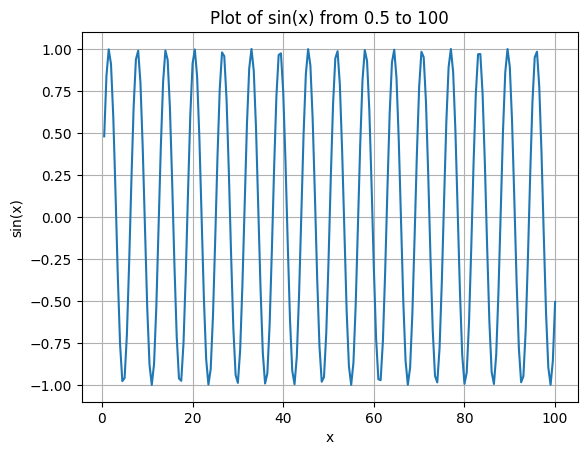

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.1, 0.5)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Plot of sin(x) from 0.5 to 100')
plt.grid(True)
plt.show()

5) y = (sin(x))/x


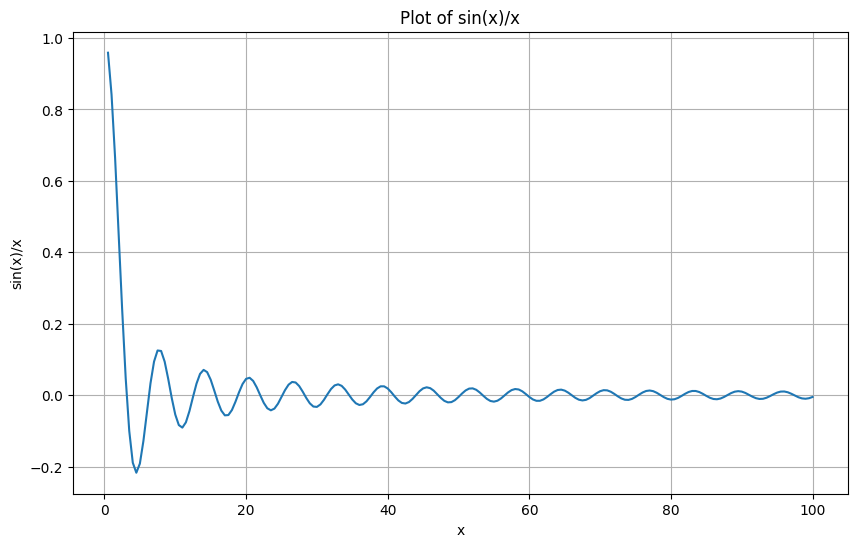

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.1, 0.5)
y = np.sin(x) / x

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sin(x)/x")
plt.title("Plot of sin(x)/x")
plt.grid(True)
plt.show()

6) y = log(x)

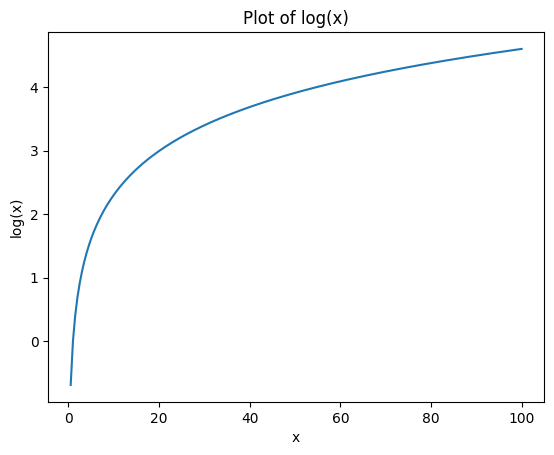

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.1, 0.5)
y = np.log(x)

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('log(x)')
plt.title('Plot of log(x)')

plt.show()

7) y = e^x

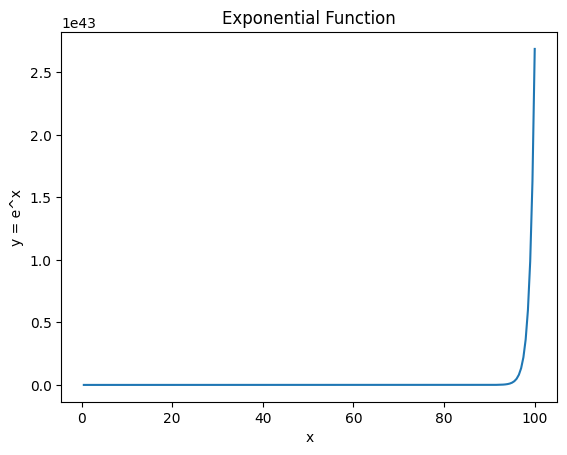

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)
y = np.exp(x)

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y = e^x')
plt.title('Exponential Function')

plt.show()

Q.10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:

import numpy as np
import pandas as pd

data = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])

column_with_highest_std = df.std().idxmax()
print("Column with highest standard deviation:", column_with_highest_std)

row_with_lowest_mean = df.mean(axis=1).idxmin()
print("Row with lowest mean:", row_with_lowest_mean)

Column with highest standard deviation: e
Row with lowest mean: 5


Q.11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
import numpy as np
import pandas as pd

# Generate a 20x5 matrix of random numbers between 1 and 2
data = np.random.uniform(1, 2, size=(20, 5))

# Create a pandas DataFrame from the matrix
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])

# Add a new column "f" which is the sum of "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Add a new column "g" based on the value in "f"
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Number of rows where "g" is "LT8"
count_lt8 = (df['g'] == 'LT8').sum()
print("Number of rows with g = LT8:", count_lt8)

# Standard deviation of "f" for rows where "g" is "LT8" and "GT8"
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()
print("Standard deviation of f for LT8:", std_lt8)
print("Standard deviation of f for GT8:", std_gt8)


Number of rows with g = LT8: 17
Standard deviation of f for LT8: 0.47069754399424396
Standard deviation of f for GT8: 0.0747365384064745


Q.12) Write a small piece of code to explain broadcasting in numpy.

In [ ]:
import numpy as np

# Create two arrays with different shapes
arr1 = np.array([1, 2, 3])  # shape: (3,)
arr2 = np.array([[10, 20, 30]])  # shape: (1, 3)

# Perform element-wise addition using broadcasting
result = arr1 + arr2

print(result)




[[11 22 33]]


Explanation

In this example, we have two arrays: arr1 with shape (3,) and arr2 with shape (1, 3). When we perform element-wise addition using the + operator, Numpy broadcasts the arrays to a common shape.

Here's what happens:

1. arr1 is broadcasted to a shape of (1, 3) by adding a new axis (i.e., arr1[:, np.newaxis]).
2. arr2 is already shaped (1, 3), so no broadcasting is needed.
3. The two arrays are now compatible for element-wise addition, resulting in a new array with shape (1, 3).

The resulting array result has the same shape as arr2, with each element being the sum of the corresponding elements from arr1 and arr2.

**Q.13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [12]:
import numpy as np

def argmin_manual(array):
    if len(array)==0:
        raise ValueError('This is an empty arrar')
    array = np.asarray(array)
    min_value = array[0]
    min_index = 0
    for i in range(1, array.size):
        if array[i] < min_value:
            min_value = array[i]
            min_index = i

    return min_index

arr = np.array([10,1,0,2,7,5])
index = argmin_manual(arr)

print("Index of the minimum element:", index)
print("Verification with np.argmin:", np.argmin(arr))


Index of the minimum element: 2
Verification with np.argmin: 2
